### Import the dataset (from 24th April 2022 to 17 May 2022) 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (15, 9)
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('curved_labelled_data.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
df.rename(columns = {'Unnamed: 0':'x_column' }, inplace = True)

In [3]:
temp_dfz = df.loc[(df['data_label'] == 0)]
df3z = temp_dfz.set_index('time')
df4z = df3z.reset_index()

In [4]:
temp_df1z = df.loc[(df['data_label'] == 1)]
df5z = temp_df1z.set_index('time')
df6z = df5z.reset_index()

### Plotting the dataset 

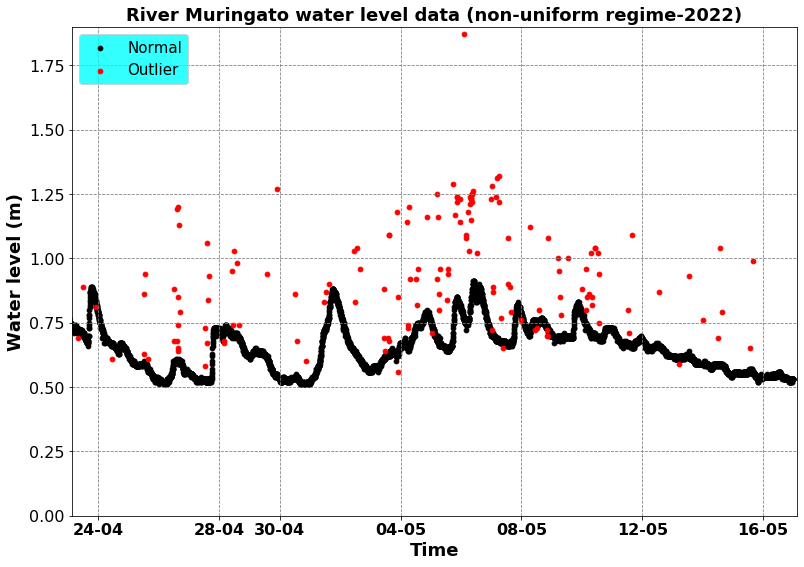

In [6]:
plt.rcParams['figure.figsize'] = (13, 9)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Normal = ax.scatter(df4z['time'],df4z['height'], c ="black", marker="o", s = 10**1.35)
Outlier = ax.scatter(df6z['time'],df6z['height'], c ="red",marker ="o", s = 10**1.35)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('River Muringato water level data (non-uniform regime-2022)', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-24 00:00:00'],['2022-05-17 23:59:59'])
ax.set_ylim(0, 1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Normal", "Outlier"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")

plt.savefig('sample_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### Gaussian Mixture Model from SCIKIT-LEARN

In [7]:
from sklearn.mixture import GaussianMixture
from numpy import quantile, where, random
import datetime as datetime
import numpy as np
water_level = np.array(df['height'])

### Anomaly detection 

In [8]:
length = np.array(df.height)
water_arrays = np.array_split(length, 388)

### Isolation Forest Algorithm.

In [9]:
sup_list = []
for array in water_arrays:
    gmm_model = GaussianMixture().fit(array.reshape(-1, 1))
    scores = gmm_model.score_samples(array.reshape(-1, 1))
    sup_list.append(scores)
#print(sup_list)

In [10]:
l = []
for i in sup_list:
    for ii in i.tolist():
        l.append(ii)        
len(l)

6712

In [11]:
thresh = quantile(scores, .018)
print(thresh)

0.21794231410318066


In [12]:
gmm_labels = l
df['gmm_labels'] = gmm_labels
df.to_csv ('gmm_output_curved.csv', header=True,index = False)

In [13]:
surprise_list = list(df['gmm_labels'])
clusters =[]
for i in surprise_list:
    if i > thresh:
        cluster = 0
    else:
        cluster = 1
    clusters.append(cluster) 
    p = clusters

In [14]:
df['gmm_labels'] = p

In [15]:
df.to_csv ('gmm_metric_curved.csv', header=True,index = False)

In [16]:
temp_df = df.loc[(df['gmm_labels'] == 0)]
df3 = temp_df.set_index('time')
df4 = df3.reset_index()

In [17]:
temp_df1 = df.loc[(df['gmm_labels'] == 1)]
df5 = temp_df1.set_index('time')
df6 = df5.reset_index()

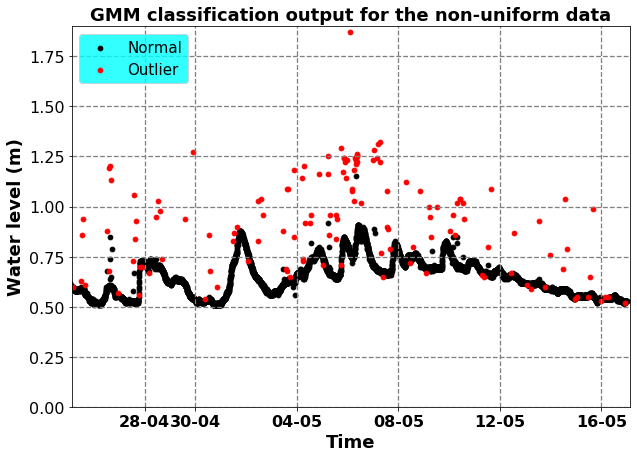

In [18]:
plt.rcParams['figure.figsize'] = (10, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Normal = ax.scatter(df4['time'],df4['height'], c ="black", marker="o", s = 10**1.35)
Outlier = ax.scatter(df6['time'],df6['height'], c ="red",marker ="o", s = 10**1.35)
ax.grid(color = 'gray', linestyle = '--', linewidth = 1.3)
ax.set_title('GMM classification output for the non-uniform data', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-26 00:00:01'],['2022-05-17 23:59:59'])
ax.set_ylim(0,1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Normal", "Outlier"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")
plt.savefig('GMM_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### Model metrics

In [19]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
data_labels = list(df['data_label'])
gmm_labels = list(df['gmm_labels'])

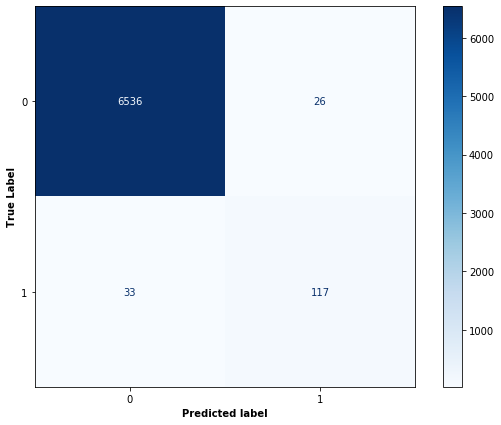

In [20]:
c_matrix = confusion_matrix (data_labels,gmm_labels)
disp = ConfusionMatrixDisplay(c_matrix )
disp.plot(cmap=plt.cm.Blues,values_format='g',)
plt.xlabel('Predicted label', weight = 'bold')
plt.ylabel('True Label', weight = 'bold')


plt.savefig('con_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [21]:
data_accuracy = accuracy_score (data_labels,gmm_labels)
data_accuracy

0.9912097735399285

In [22]:
data_precision = precision_score (data_labels,gmm_labels)
data_precision

0.8181818181818182

In [23]:
data_recall_score = recall_score (data_labels,gmm_labels)
data_recall_score

0.78

In [24]:
data_f1_score = f1_score (data_labels,gmm_labels)
data_f1_score

0.7986348122866895